# Лабораторная работа №8

**Студент: Гаптулхаков Р.Р.**

**Группа: М8О-408Б-19**

## Вариант: 1

**Задание**
Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, y, t)$.

***Уравнение:***

$\large\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + a\frac{\partial^2 u}{\partial y^2}, a > 0$

***Граничные условия:***

\begin{equation*}
 \begin{cases}
   u(0, y, t) = cos(\mu_2y) exp(-(\mu_1^2 + \mu_2^2)at)
   \\
   u(\pi, y, t) = (-1)^{\mu_1}cos(\mu_2y)exp(-(\mu_1^2 +\mu_2^2)at)
   \\
   u(x, 0, t) = cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at
   \\
   u(x, \pi, t) = (-1)^{\mu_2}cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at)
   \\
   u(x, y, 0) = cos(\mu_1x)cos(\mu_2y)
 \end{cases}
\end{equation*}

***Аналитическое решение:***

$U(x, y, t) = cos(\mu_1x)cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
xs= (0, math.pi)
ys= (0, math.pi)
ts= (0, 1)

a = 1
mu1 = 1
mu2 = 1

h_x = 0.01
h_y = 0.01
tau = 0.01

In [ ]:
def phi_0(y, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)


def phi_1(y, t, a=a, mu1=mu1, mu2=mu2):
    return (-1)**mu1 * math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)

def phi_2(x, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.exp(-(mu1**2 + mu2**2) * a * t)

def phi_3(x, t, a=a, mu1=mu1, mu2=mu2):
    return (-1)**mu2 * math.cos(mu1*x) * math.exp(-(mu1**2 + mu2**2) * a * t)


def psi(x, y, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.cos(mu2*y)

def answer(x, y, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)

In [ ]:
def get_ans(hx, hy, tau,  xs, ys, ts):
    x = np.arange(xs[0], xs[1] + hx, hx)
    y = np.arange(ys[0], ys[1] + hy, hy)
    t = np.arange(ts[0], ts[1] + tau, tau)
    
    ans = np.zeros((len(t), len(x), len(y)))

    for idx in range(len(x)):
        for idy in range(len(y)):
            for idt in range(len(t)):
                ans[idt][idx][idy] = answer(x[idx], y[idy], t[idt])
    return ans

In [ ]:
ans = get_ans(h_x, h_y, tau, xs, ys, ts)

### Метод переменных направлений

Для момента времени $k+1/2$ производная по иксу будет аппроксимироваться неявно, а по игреку - явно. Для момента времени $k+1$ наоборот.

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
   \\
   au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_y^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_y^2$

$d = a\tau h_x^2 u_{ij-1}^k+(2h_x^2h_y^2 - 2a\tau h_x^2)u_{ij}^k+a\tau h_x^2u_{ij+1}^k$

$d_1=d - au_{0j}^{k+1/2}$

$d_{N-1}=d - cu_{Nj}^{k+1/2}$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
   \\
   au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_x^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_x^2$

$d = a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2}$

$d_1=d - au_{i0}^{k+1}$

$d_{N-1}=d - cu_{iN}^{k+1}$

In [ ]:
def error(A, B):
    """
    Calculate max absolute error of elements of matrices A and B
    """
    assert A.shape == B.shape
    return abs(A - B).max()

In [ ]:
def tridiagonal_solve(A, b):
    """
    Solves Ax=b
    """
    n = len(A)
    # Step 1. Forward
    v = [0 for _ in range(n)]
    u = [0 for _ in range(n)]
    v[0] = A[0][1] / -A[0][0]
    u[0] = b[0] / A[0][0]
    for i in range(1, n-1):
        v[i] = A[i][i+1] / (-A[i][i] - A[i][i-1] * v[i-1])
        u[i] = (A[i][i-1] * u[i-1] - b[i]) / (-A[i][i] - A[i][i-1] * v[i-1])
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2] * u[n-2] - b[n-1]) / (-A[n-1][n-1] - A[n-1][n-2] * v[n-2])

    # Step 2. Backward
    x = [0 for _ in range(n)]
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
    return np.array(x)

In [ ]:
def variable_directions_method(
    xs,
    ys, 
    ts,
    h_x,
    h_y, 
    tau,
    a=a,
    mu1=mu1,
    mu2=mu2,
    phi_0=phi_0,
    phi_1=phi_1,
    phi_2=phi_2,
    phi_3=phi_3,
    psi=psi,
):
    """
    Метод переменных направлений для ДУ параболического типа
    """
    x = np.arange(xs[0], xs[1] + h_x, h_x)
    y = np.arange(ys[0], ys[1] + h_y, h_y)
    t = np.arange(ts[0], ts[1] + tau, tau)
    result = np.zeros((len(t), len(x), len(y)))

    
    for x_id in range(len(x)):
        for y_id in range(len(y)):
            result[0][x_id][y_id] = psi(x[x_id], y[y_id], mu1, mu2)
    
    for t_id in range(1, len(t)):
        
        U_halftime = np.zeros((len(x), len(y)))
        
        # граничные условия
        for x_id in range(len(x)):
            result[t_id][x_id][0] = phi_2(x[x_id], t[t_id], a, mu1, mu2)
            result[t_id][x_id][-1] = phi_3(x[x_id], t[t_id], a, mu1, mu2)
            U_halftime[x_id][0] = phi_2(x[x_id], t[t_id] - tau / 2, a, mu1, mu2)
            U_halftime[x_id][-1] = phi_3(x[x_id], t[t_id] - tau / 2, a, mu1, mu2)
        # граничные условия
        for y_id in range(len(y)):
            result[t_id][0][y_id] = phi_0(y[y_id], t[t_id], a, mu1, mu2)
            result[t_id][-1][y_id] = phi_1(y[y_id], t[t_id], a, mu1, mu2)
            U_halftime[0][y_id] = phi_0(y[y_id], t[t_id] - tau / 2, a, mu1, mu2)
            U_halftime[-1][y_id] = phi_1(y[y_id], t[t_id] - tau / 2, a, mu1, mu2)
        
        # решение системы
        for y_id in range(1, len(y) - 1):
            A = np.zeros((len(x) - 2, len(x) - 2))
            b = np.zeros((len(x) - 2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
            A[0][1] = -a * tau * h_y**2
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau * h_y**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
                A[i][i+1] = -a * tau * h_y**2
            A[-1][-2] = -a * tau * h_y**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2

            for x_id in range(1, len(x) - 1):
                b[x_id-1] = (
                    result[t_id-1][x_id][y_id-1] * a * tau * h_x**2
                    + result[t_id-1][x_id][y_id] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_x**2)
                    + result[t_id-1][x_id][y_id+1] * a * tau * h_x**2
                )
            b[0] -= (-a * tau * h_y**2) * phi_0(y[y_id], t[t_id] - tau / 2, a, mu1, mu2)
            b[-1] -= (-a * tau * h_y**2) * phi_1(y[y_id], t[t_id] - tau / 2, a, mu1, mu2)
            U_halftime[1:-1, y_id] = np.array(tridiagonal_solve(A, b))
        
        # решение системы
        for x_id in range(1, len(x)-1):
            A = np.zeros((len(y)-2, len(y)-2))
            b = np.zeros((len(y)-2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
            A[0][1] = -a * tau * h_x**2
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau * h_x**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
                A[i][i+1] = -a * tau * h_x**2
            A[-1][-2] = -a * tau * h_x**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2

            for y_id in range(1, len(y)-1):
                b[y_id-1] = (
                    U_halftime[x_id-1][y_id] * a * tau * h_y**2
                    + U_halftime[x_id][y_id] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_y**2)
                    + U_halftime[x_id+1][y_id] * a * tau * h_y**2
                )
            b[0] -= (-a * tau * h_x**2) * phi_2(x[x_id], t[t_id], a, mu1, mu2)
            b[-1] -= (-a * tau * h_x**2) * phi_3(x[x_id], t[t_id], a, mu1, mu2)
            result[t_id][x_id][1:-1] = tridiagonal_solve(A, b)
    return result

In [ ]:
variable_directions_solution = variable_directions_method(
    xs,
    ys,
    ts,
    h_x=h_x,
    h_y=h_y,
    tau=tau,
)

In [ ]:
print("Error: ", error(variable_directions_solution, ans))

Error:  5.797684103603373e-05


### Метод дробных шагов

Метод дробных шагов использует неявные схемы.

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
   \\
   au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau$

$b_j=h_x^2 + 2a\tau$

$d = h_x^2u_{ij}^k$

$d_1=d - au_{0j}^{k+1/2}$

$d_{N-1}=d - cu_{Nj}^{k+1/2}$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
   \\
   au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_x^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_x^2$

$d = a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2}$

$d_1=d - au_{i0}^{k+1}$

$d_{N-1}=d - cu_{iN}^{k+1}$


In [ ]:
def fractional_steps_method(
    xs,
    ys,
    ts, 
    h_x,
    h_y,
    tau,
    a=a,
    mu1=mu1,
    mu2=mu2,
    phi_0=phi_0,
    phi_1=phi_1,
    phi_2=phi_2,
    phi_3=phi_3,
    psi=psi
):
    """
    Метод дробных шагов для ДУ задачи параболического типа
    """
    x = np.arange(xs[0], xs[1] + h_x, h_x)
    y = np.arange(ys[0], ys[1] + h_y, h_y)
    t = np.arange(ts[0], ts[1] + tau, tau)
    result = np.zeros((len(t), len(x), len(y)))

    for x_id in range(len(x)):
        for y_id in range(len(y)):
            result[0][x_id][y_id] = psi(x[x_id], y[y_id], mu1, mu2)
    
    for t_id in range(1, len(t)):
        U_halftime = np.zeros((len(x), len(y)))
        
        # граничные условия
        for x_id in range(len(x)):
            result[t_id][x_id][0] = phi_2(x[x_id], t[t_id], a, mu1, mu2)
            result[t_id][x_id][-1] = phi_3(x[x_id], t[t_id], a, mu1, mu2)
            U_halftime[x_id][0] = phi_2(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[x_id][-1] = phi_3(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
        
        for y_id in range(len(y)):
            result[t_id][0][y_id] = phi_0(y[y_id], t[t_id], a, mu1, mu2)
            result[t_id][-1][y_id] = phi_1(y[y_id], t[t_id], a, mu1, mu2)
            U_halftime[0][y_id] = phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[-1][y_id] = phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
        
        #  система 1
        for y_id in range(1, len(y)-1):
            A = np.zeros((len(x)-2, len(x)-2))
            b = np.zeros((len(x)-2))

            A[0][0] = h_x**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau
                A[i][i] = h_x**2 + 2 * a * tau
                A[i][i+1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_x**2 + 2 * a * tau

            for x_id in range(1, len(x)-1):
                b[x_id-1] = result[t_id-1][x_id][y_id] * h_x**2
            b[0] -= (-a * tau) * phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[1:-1, y_id] = np.array(tridiagonal_solve(A, b))
        
        # система 2
        for x_id in range(1, len(x)-1):
            A = np.zeros((len(y)-2, len(y)-2))
            b = np.zeros((len(y)-2))

            A[0][0] = h_y**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau
                A[i][i] = h_y**2 + 2 * a * tau
                A[i][i+1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_y**2 + 2 * a * tau

            for y_id in range(1, len(y)-1):
                b[y_id-1] = U_halftime[x_id][y_id] * h_y**2
            b[0] -= (-a * tau) * phi_2(x[x_id], t[t_id], a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_3(x[x_id], t[t_id], a, mu1, mu2)
            result[t_id][x_id][1:-1] = tridiagonal_solve(A, b)
    return result

In [ ]:
fractional_steps_solution = fractional_steps_method(
    xs,
    ys,
    ts,
    h_x,
    h_y,
    tau
)

In [ ]:
print("Error: ", error(fractional_steps_solution, ans))

Error:  0.0005918981178177352


## Визуализация

In [ ]:
def plot_results(solutions, cur_time, cur_y, xs, ys, h_x,  h_y, tau):
    
    x = np.arange(xs[0], xs[1] + h_x, h_x)
    y = np.arange(ys[0], ys[1] + h_y, h_y)
    t = np.arange(ts[0], ts[1] + tau, tau)
    
    cur_y_id = abs(y - cur_y).argmin()
    cur_t_id = abs(t - cur_time).argmin()

    plt.figure(figsize=(15, 9))
    
    for method_name, solution in solutions.items():
        plt.plot(x, solution[cur_t_id][:, cur_y_id], label=method_name)

    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def plot_errors_from_time(solutions, ans, ts, tau):

    t = np.arange(ts[0], ts[1] + tau,  tau)

    plt.figure(figsize=(15, 9))
    
    for method_name, solution in solutions.items():
        errors = np.array([
            error(solution[:, i], ans[:, i])
            for i in range(len(t))
        ])
        plt.plot(t, errors, label=method_name)

    plt.xlabel('t')
    plt.ylabel('Error')

    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
solutions = {
    "fractional_steps_solution"   : fractional_steps_solution, 
    "variable_directions_solution": variable_directions_solution,
    "analytical"                  : ans
}

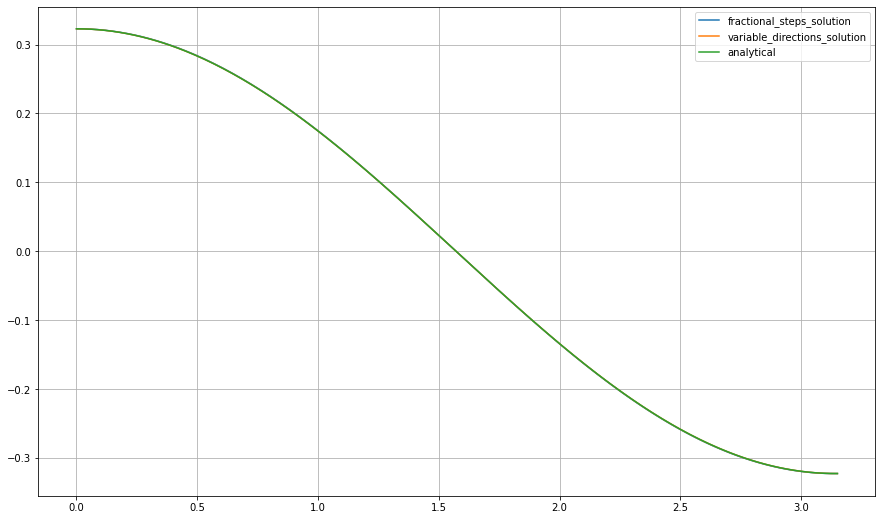

In [ ]:
plot_results(solutions, 0.5, 0.5, xs, ys, h_x, h_y, tau)

In [ ]:
solutions = {
    "fractional_steps_solution"   : fractional_steps_solution, 
    "variable_directions_solution": variable_directions_solution,
}

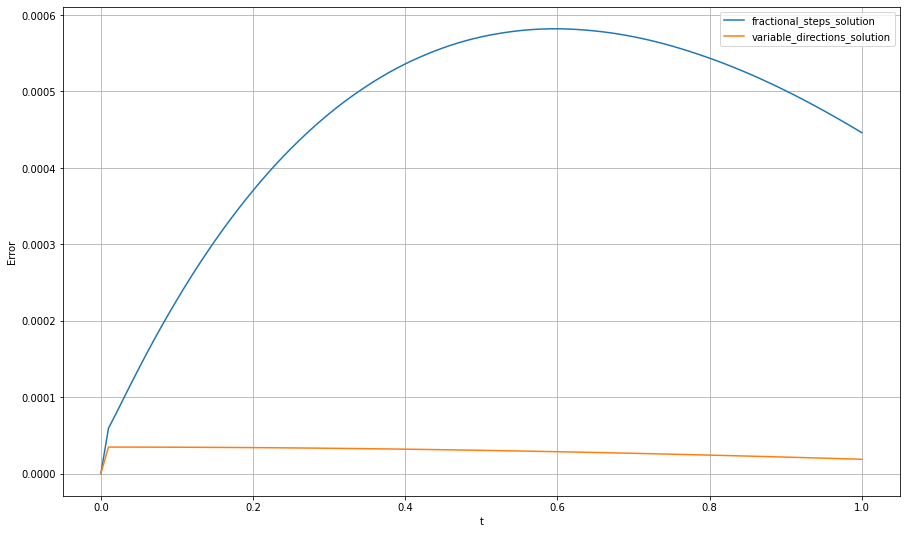

In [ ]:
plot_errors_from_time(
    solutions,
    ans,
    ts,
    tau=tau
)